In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('SP500Data.csv',index_col=0)

In [ ]:
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [ ]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(20)

BRK.B    1.000000
KMI      1.000000
ZION     1.000000
INTC     1.000000
CHD      1.000000
AIG      1.000000
BF.B     1.000000
BKNG     1.000000
GEHC     0.960501
CEG      0.739884
OGN      0.574181
OTIS     0.293834
CARR     0.293834
CTVA     0.095376
DOW      0.051060
FOX      0.046243
FOXA     0.045279
NWL      0.000000
NSC      0.000000
NVR      0.000000
dtype: float64

In [ ]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)

In [ ]:
dataset=dataset.fillna(method='ffill')

In [ ]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * np.sqrt(252)
data=returns

In [ ]:
# All the variables should be on the same scale before applying clustering, 
# otherwise a feature with large values will dominate the result. We use 
# StandardScaler in sklearn to standardize the dataset’s features onto
# unit scale (mean = 0 and variance = 1).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns, index = data.index)
# summarize transformed data
rescaledDataset.head(5)

,Returns,Volatility
A,0.443739,-0.715007
AAL,-1.105871,2.667893
AAP,-1.094688,-0.247809
AAPL,1.510524,-0.287582
ABBV,-0.201491,-1.020906


In [ ]:
X=rescaledDataset
X.head(5)

,Returns,Volatility
A,0.443739,-0.715007
AAL,-1.105871,2.667893
AAP,-1.094688,-0.247809
AAPL,1.510524,-0.287582
ABBV,-0.201491,-1.020906


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation

from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

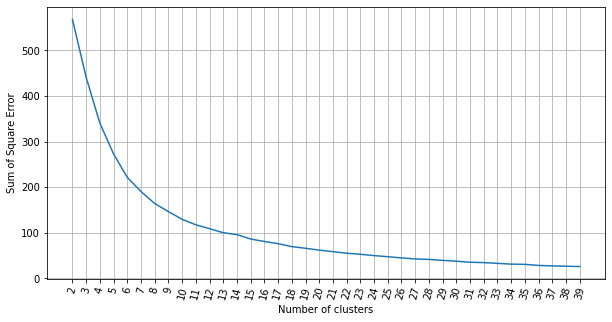

In [ ]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)


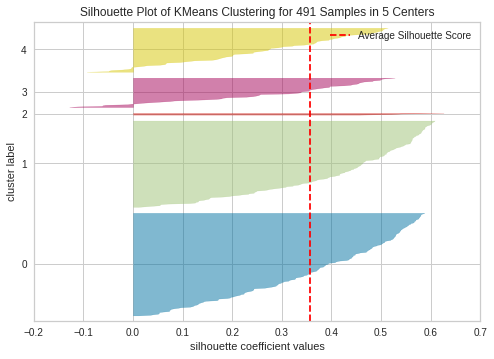

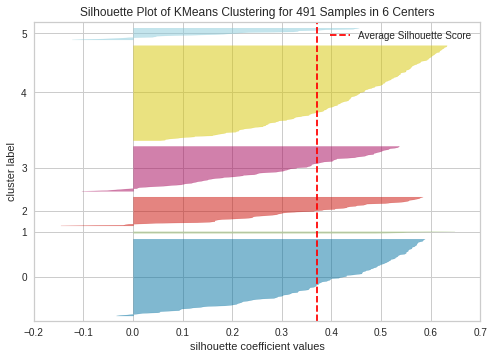

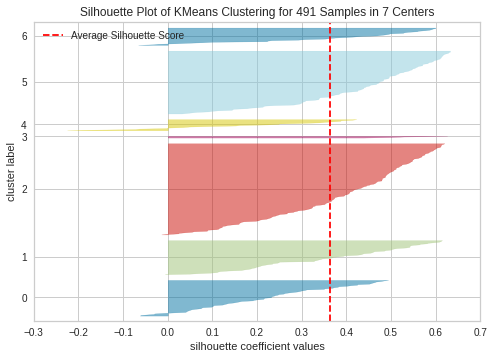

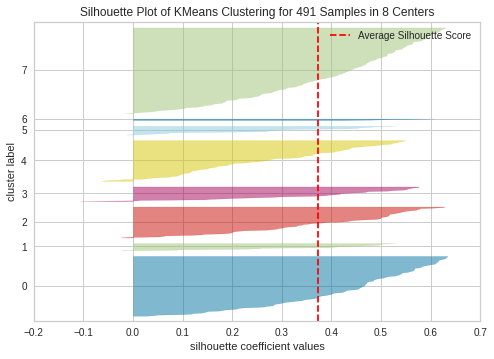

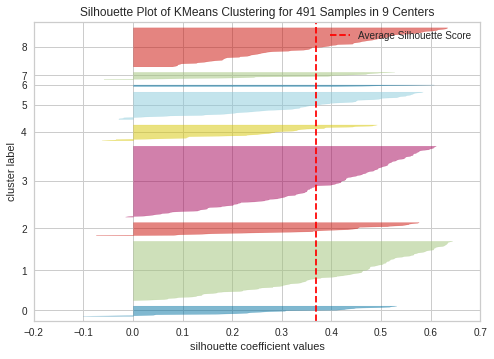

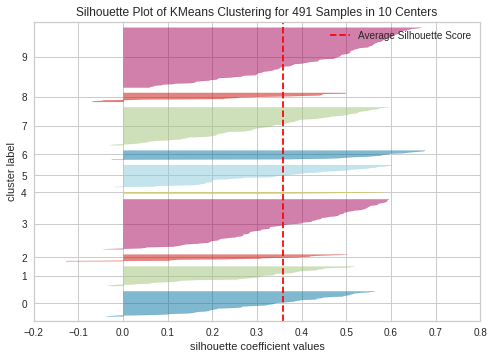

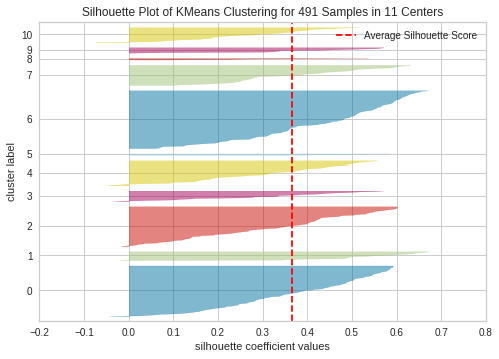

In [ ]:
from sklearn import metrics


from yellowbrick.cluster import SilhouetteVisualizer


for i in range(5,12):
    # Instantiate the clustering model and visualizer
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [ ]:
nclust=7
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)


target_labels = k_means.predict(X)

In [ ]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 33


In [ ]:
labels

array([11, 28, 12, 24,  3, 11,  3,  5, 11,  6, 15, 17, 17, 15,  0,  0, 15,
        7,  7, 11,  3,  8, 23, 18, 17,  7,  8, 14,  1, 11,  0, 22,  3,  7,
       22, 30, 11,  7,  2, 17, 17, 23,  3,  0, 30, 14, 15, 30, 17, 15,  5,
       31,  6,  7, 25, 26, 16,  0, 13, 18, 30, 14, 16, 30,  0,  3, 17,  3,
        6, 12, 13, 17, 30,  8, 30, 17,  3, 15,  3,  4, 22, 24,  5, 13, 22,
       16, 14,  7,  6,  6,  0, 25, 18, 14, 14, 24, 17,  0, 13, 14, 16,  3,
       23, 11, 32,  5,  3, 15, 13, 14, 15,  7,  5, 22, 13, 14, 15,  3,  6,
        2, 25, 18, 13,  5, 23, 17, 17, 22, 11, 12, 31, 14,  6, 11, 13,  7,
       16, 14,  0,  6, 26, 28,  8,  7, 30, 14,  0,  5, 14, 30, 30, 13,  7,
        9, 23,  8, 11, 14, 10, 14, 14,  5, 14, 26, 14,  7,  3,  3, 18, 17,
       16, 10, 11,  1, 11, 13, 14, 12, 12,  7, 16, 13, 30, 12, 12,  6, 13,
        8,  8, 14,  3, 16, 13,  0, 32,  7,  7, 16, 22, 30, 30, 30, 13,  3,
       30, 11, 10, 12, 13, 15, 17,  8,  6, 14, 15, 11,  3, 13,  6,  0,  3,
       13, 17, 30, 22, 14

In [ ]:
from sklearn import metrics
print("kmeans", metrics.silhouette_score(X, k_means.labels_))
print("aff prop", metrics.silhouette_score(X, ap.labels_))

kmeans 0.3636995992047745
aff prop 0.3439654068768759


In [ ]:
pd.DataFrame(X).index

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE',
       ...
       'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', length=491)

In [ ]:
pd.DataFrame(X).head()

,Returns,Volatility
A,0.443739,-0.715007
AAL,-1.105871,2.667893
AAP,-1.094688,-0.247809
AAPL,1.510524,-0.287582
ABBV,-0.201491,-1.020906


In [ ]:
pd.DataFrame(k_means.labels_, columns = ['cluster'], index= pd.DataFrame(X).index ).head()

,cluster
A,0
AAL,1
AAP,3
AAPL,6
ABBV,4


In [ ]:
pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'], index= pd.DataFrame(X).index )],axis = 1)

In [ ]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'], index= pd.DataFrame(X).index )],axis = 1)
output=cluster_output.groupby('cluster').mean()
print(output)

          Returns  Volatility
cluster                      
0        0.252448   -0.360267
1       -0.108682    1.130301
2        0.869046    2.988127
3       -0.982187    0.101819
4       -0.631747   -0.870499
5        5.592167    3.436778
6        1.629253    0.803251


In [ ]:
cluster_output[cluster_output.cluster == 2].index

Index(['APA', 'BBWI', 'CCL', 'CZR', 'DVN', 'EQT', 'ETSY', 'FANG', 'HAL', 'MGM',
       'MRO', 'NCLH', 'OXY', 'PCG', 'RCL', 'TRGP'],
      dtype='object')

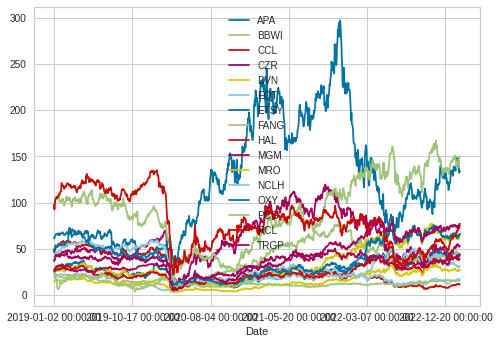

In [ ]:
dataset[cluster_output[cluster_output.cluster == 2].index].plot()

In [ ]:
# %% hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.cluster.hierarchy import fcluster


In [ ]:
#Calulate linkage
Z= linkage(X, method='ward')
Z[0]

array([1.37000000e+02, 1.59000000e+02, 3.51423932e-03, 2.00000000e+00])

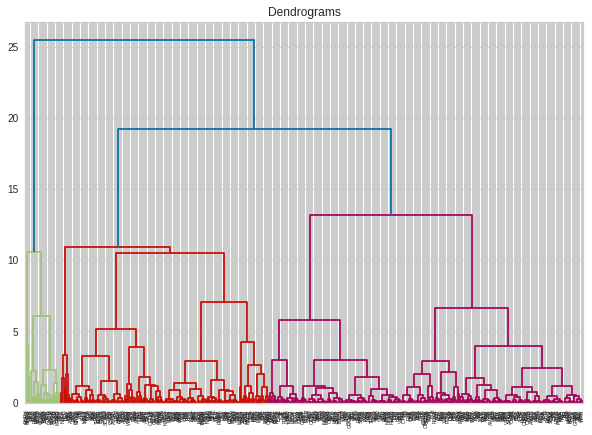

In [ ]:
#Plot Dendogram
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dendrogram(Z,labels = X.index)
plt.show()

In [ ]:
distance_threshold = 32
clusters = fcluster(Z, distance_threshold, criterion='distance')
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster'])
chosen_clusters['cluster'].unique().shape

(1,)

In [ ]:
# clustering with hierarcical clusters
from sklearn.cluster import  AgglomerativeClustering

nclust = 7
hc = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
clust_labels1 = hc.fit_predict(X)

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), metric='euclidean'))

hc 0.30934217741248143
